In [19]:
import importlib

import training
importlib.reload(training)
import graph_vis
importlib.reload(graph_vis)
import graph_creation
importlib.reload(graph_creation)
import utils
importlib.reload(utils)
import train_n2v
importlib.reload(train_n2v)

import networkx as nx


Using device: cpu
Random seed set to: 42
p_values: [1, 2]
q_values: [1, 2]



----------Basic graph information-----------
Type:  <class 'networkx.classes.graph.Graph'>
Graph with 100 nodes and 290 edges
Number of nodes:  100
Number of edges:  290
Average node degree:  5.8
Has isolated nodes:  0
Has self loops:  0
Is directed:  False
----------Graph extra statistics-----------
Number of connected components: 1
Number of nodes in largest component: 100
Average Clustering Coefficient: 0.359891581904134
Transitivity/Global clustering coeff: 0.1805940594059406
Average Shortest Path (Largest Component): 2.6624242424242426
Number of Connected Components: 1

Node labels:  {0: 2, 1: 6, 2: 5, 3: 0, 4: 2, 5: 3, 6: 2, 7: 2, 8: 1, 9: 4, 10: 2, 11: 4, 12: 4, 13: 2, 14: 4, 15: 3, 16: 6, 17: 2, 18: 4, 19: 4, 20: 0, 21: 3, 22: 4, 23: 0, 24: 2, 25: 1, 26: 3, 27: 5, 28: 4, 29: 6, 30: 1, 31: 4, 32: 6, 33: 6, 34: 6, 35: 6, 36: 1, 37: 1, 38: 4, 39: 2, 40: 4, 41: 2, 42: 6, 43: 4, 44: 6, 45: 6, 46: 6, 47: 0, 48: 3, 49: 0, 50: 0, 51: 1, 52: 2, 53: 1, 54: 6, 55: 0, 56: 5, 57: 3, 58: 5,

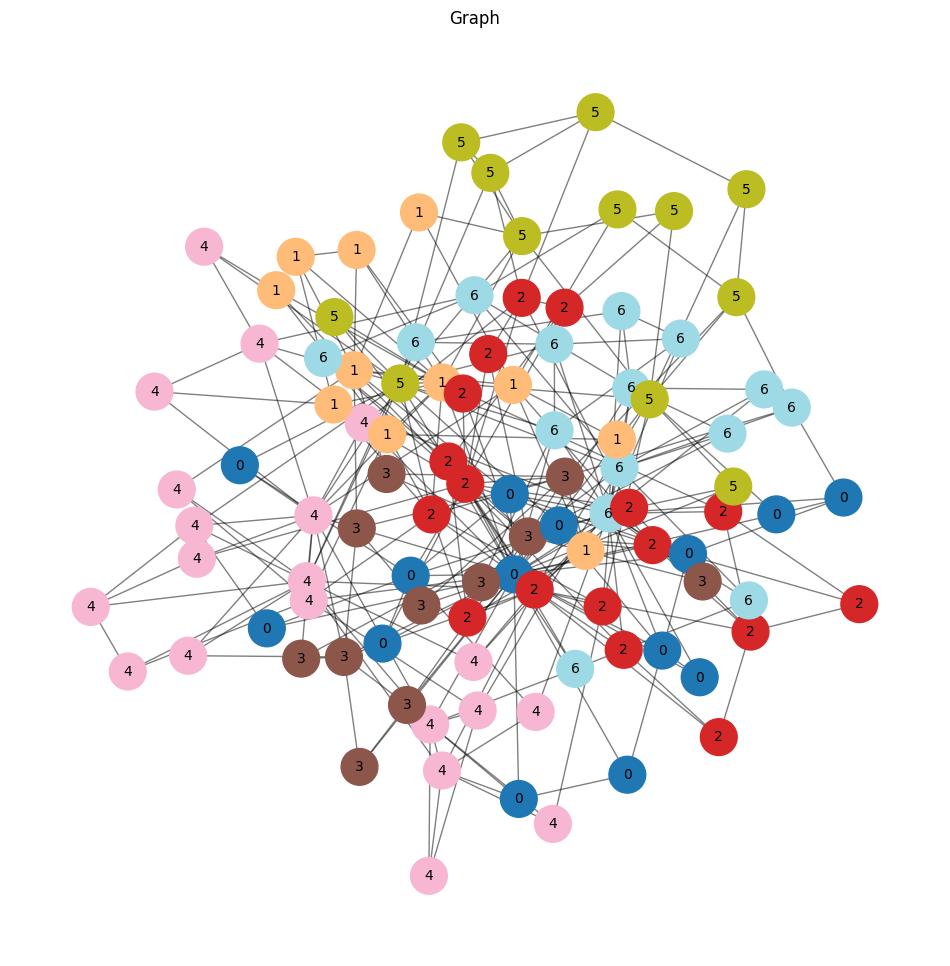

Node type information available for histogram.
    node_type  count
0          0     14
1          1     11
2          2     17
3          3     11
4          4     20
5          5     12
6          6     15


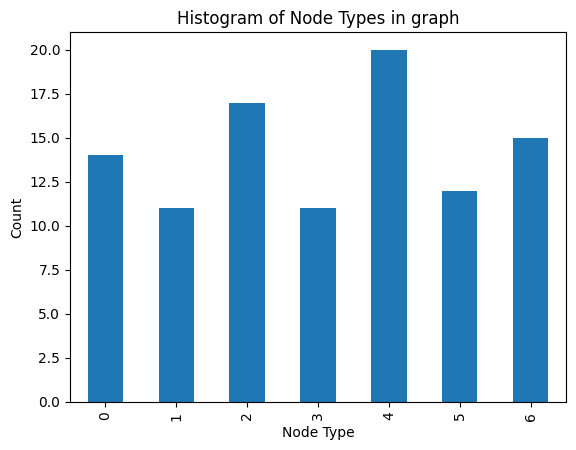

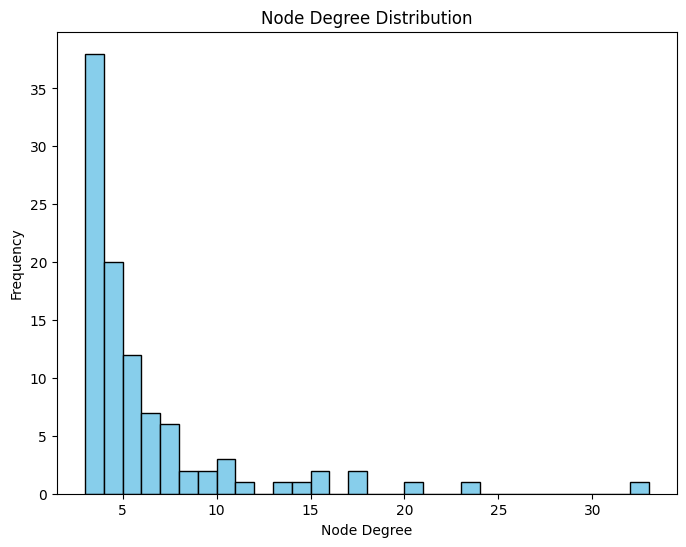

In [22]:
# https://networkx.org/documentation/stable/reference/generators.html#module-networkx.generators.community

# graph_hierarchy = graph_creation.graph_with_hierarchy_generator(2, 10, False,print_text=False) # 2, 10
# graph_vis.print_graph_info_cluster(graph_hierarchy)

# graph_hierarchy = graph_creation.create_hierarchical_graph_new(branching_factors=[2,3,2,3], noise_edges=0)
# 8,5,3,3,2
# graph_hierarchy = nx.random_powerlaw_tree(1000,3, seed = 42, tries = 10000)
graph_hierarchy = utils.add_louvain_community_labels(nx.powerlaw_cluster_graph(100, 3, 0.5, seed=42))

# for this we need the greedy labeling

graph_vis.print_graph_info_cluster(graph_hierarchy)

graph_vis.graph_visualizer(graph_hierarchy, layout='spring')

data_hierarchy = utils.nx_to_pytorch_data_converter(graph_hierarchy)
graph_vis.pyg_graph_data_visualizer(data_hierarchy)


----------Basic graph information-----------
Type:  <class 'networkx.classes.graph.Graph'>
Graph named 'stochastic_block_model' with 50 nodes and 109 edges
Graph creation function:  graph_with_communities_generator_sb
Number of nodes:  50
Number of edges:  109
Average node degree:  4.36
Has isolated nodes:  0
Has self loops:  0
Is directed:  False
----------Graph extra statistics-----------
Number of connected components: 1
Number of nodes in largest component: 50
Average Clustering Coefficient: 0.37423809523809515
Transitivity/Global clustering coeff: 0.41745283018867924
Average Shortest Path (Largest Component): 5.581224489795918
Number of Connected Components: 1


----------Basic graph information-----------
Type:  <class 'networkx.classes.graph.Graph'>
Graph named 'stochastic_block_model' with 50 nodes and 109 edges
Graph creation function:  graph_with_communities_generator_sb
Number of nodes:  50
Number of edges:  109
Average node degree:  4.36
Has isolated nodes:  0
Has self loo

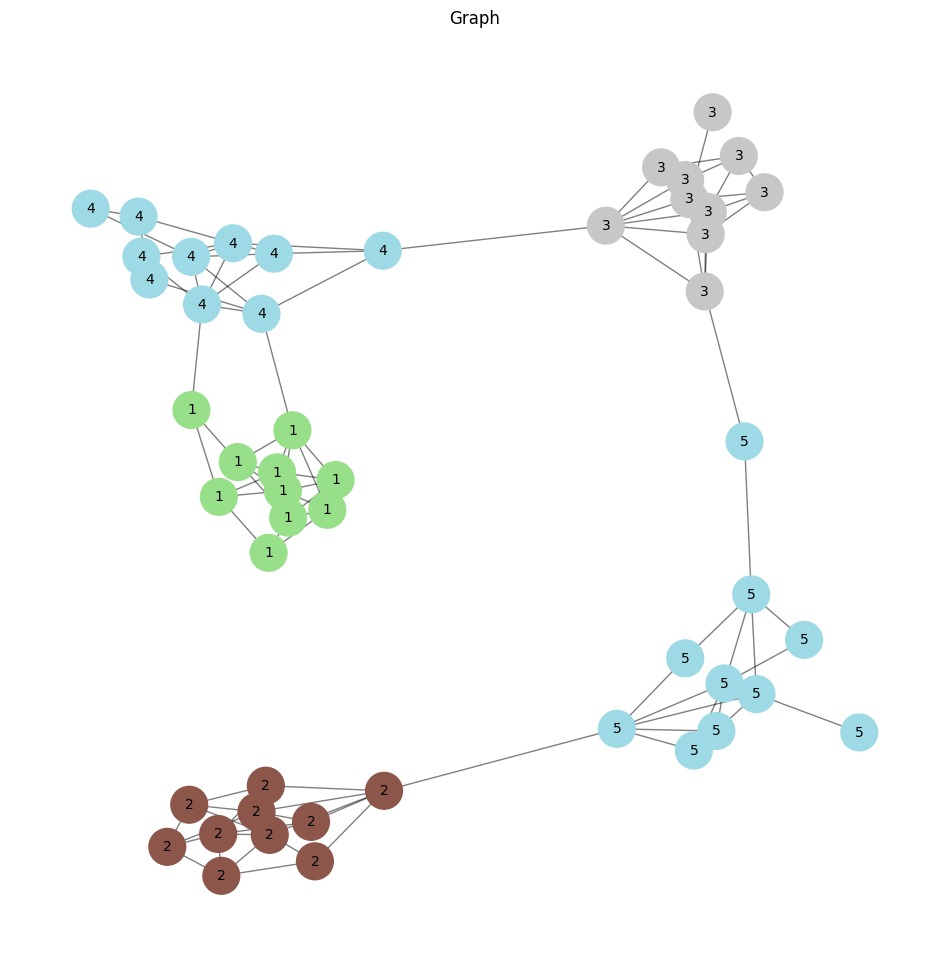

Node type information available for histogram.
    node_type  count
0          1     10
1          2     10
2          3     10
3          4     10
4          5     10


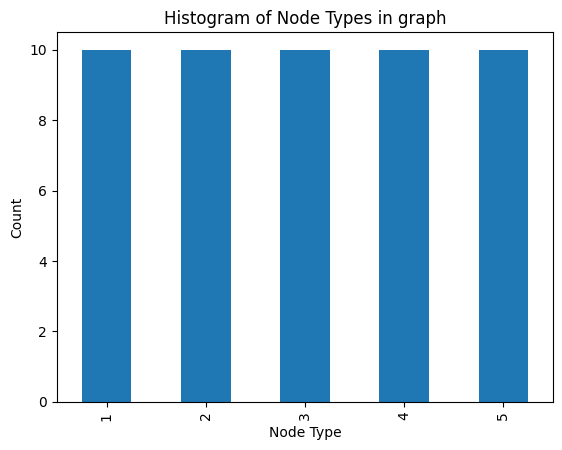

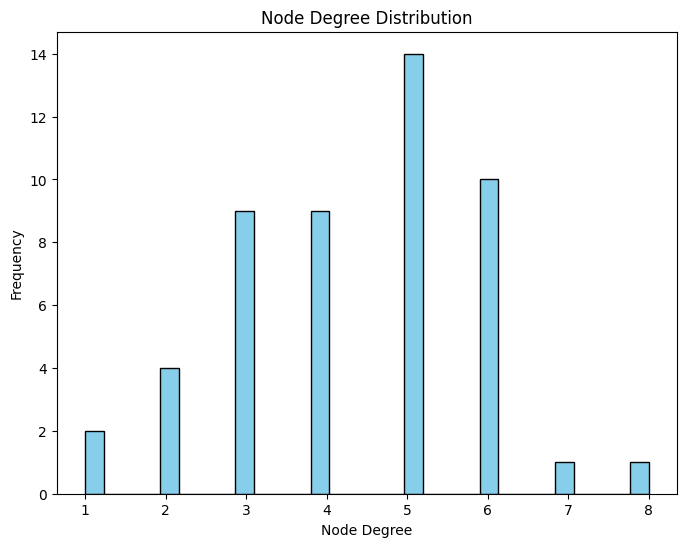

In [23]:
graph_community = graph_creation.graph_with_communities_generator_sb(5,10, print_text=False)# 15,80
graph_vis.print_graph_info_cluster(graph_community)

graph_vis.print_graph_info_cluster(graph_community)

graph_vis.graph_visualizer(graph_community, layout='spring')

data_hierarchy = utils.nx_to_pytorch_data_converter(graph_community)
graph_vis.pyg_graph_data_visualizer(data_hierarchy)

In [ ]:
# graph_vis.graph_visualizer(graph_community, layout='spring')
# graph_vis.graph_visualizer(graph_hierarchy, layout='bfs')


Node type information available for histogram.
    node_type  count
0          0      1
1          1     97
2          2   1234
3          3      1


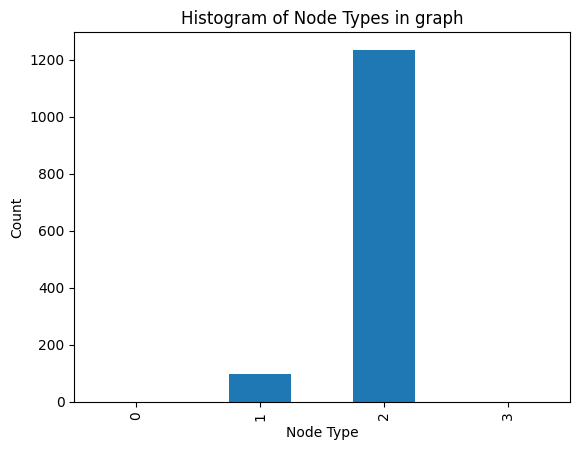

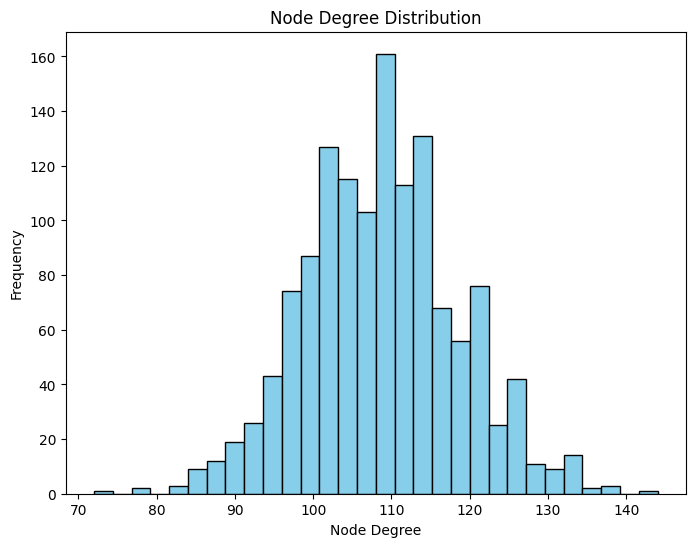

In [69]:
data_community = utils.nx_to_pytorch_data_converter(graph_community)
data_hierarchy = utils.nx_to_pytorch_data_converter(graph_hierarchy)

graph_vis.pyg_graph_data_visualizer(data_hierarchy)


In [ ]:
# data = graph_lib.create_masks(data_community)
data_h = utils.create_masks(data_hierarchy)
data_c = utils.create_masks(data_community)

data_list=[data_c, data_h]

#TODO
[] make it optional to print all figures, default is only acc
[] on figure: name of dataset and q and p params
[] graph string modify to store creation function info for printing

how do i make p and q changable?

[x] grap info printout: redundant text off, make it more readable


Running with p=1_q=2 = {'embedding_dim': 128, 'walk_length': 70, 'context_size': 14, 'walks_per_node': 18, 'num_negative_samples': 1, 'sparse': True, 'p': 1, 'q': 2}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 3 epochs...


Epoch: 001, Loss: 9.6463, Acc: 0.0741, Duration: 40.44s
    New best model saved with accuracy: 0.0741


Epoch: 002, Loss: 8.8669, Acc: 0.0889, Duration: 41.43s
    New best model saved with accuracy: 0.0889


Epoch: 003, Loss: 8.1738, Acc: 0.1111, Duration: 54.22s
    New best model saved with accuracy: 0.1111

Training finished.
Total elapsed time: 136.17 seconds
Best test accuracy: 0.1111
Best model state saved to './training_data/models/node2vec_'


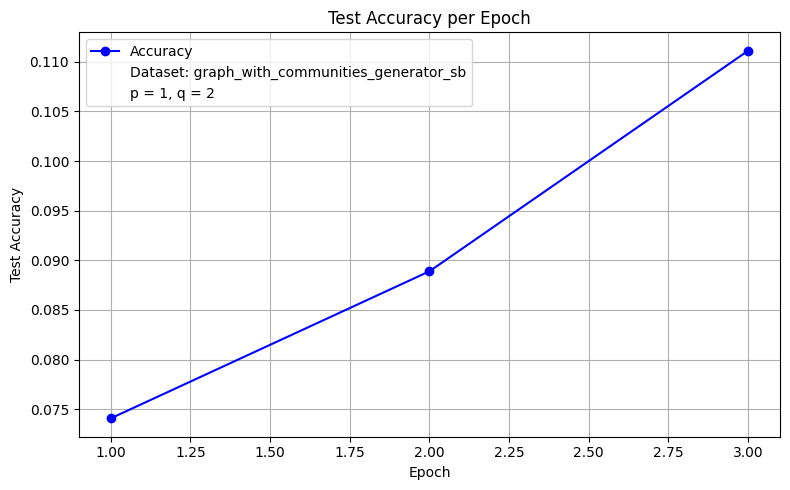

Running with p=2_q=1 = {'embedding_dim': 128, 'walk_length': 70, 'context_size': 14, 'walks_per_node': 18, 'num_negative_samples': 1, 'sparse': True, 'p': 2, 'q': 1}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 3 epochs...


Epoch: 001, Loss: 9.6683, Acc: 0.1037, Duration: 40.85s
    New best model saved with accuracy: 0.1037


Epoch: 002, Loss: 8.9296, Acc: 0.1185, Duration: 40.66s
    New best model saved with accuracy: 0.1185


Epoch: 003, Loss: 8.2602, Acc: 0.1630, Duration: 44.62s
    New best model saved with accuracy: 0.1630

Training finished.
Total elapsed time: 126.15 seconds
Best test accuracy: 0.1630
Best model state saved to './training_data/models/node2vec_'


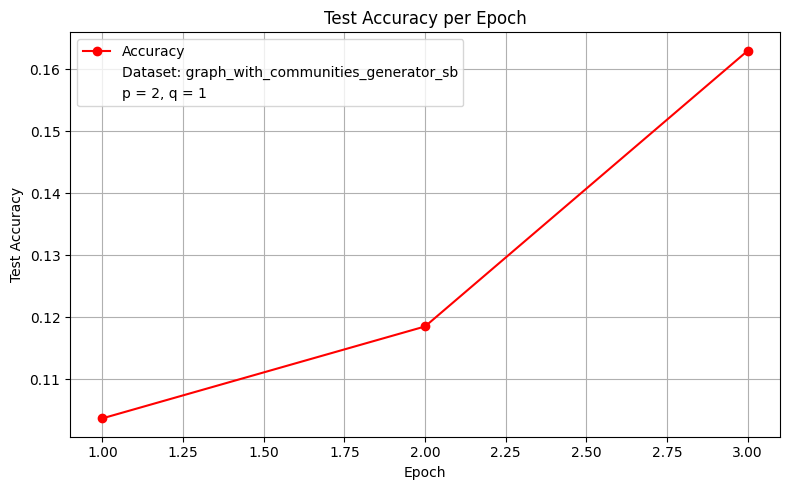

Running with p=1_q=2 = {'embedding_dim': 128, 'walk_length': 70, 'context_size': 14, 'walks_per_node': 18, 'num_negative_samples': 1, 'sparse': True, 'p': 1, 'q': 2}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 3 epochs...


Epoch: 001, Loss: 9.9745, Acc: 0.7000, Duration: 15.80s
    New best model saved with accuracy: 0.7000


Epoch: 002, Loss: 9.5601, Acc: 0.7000, Duration: 15.03s


Epoch: 003, Loss: 9.1809, Acc: 0.7000, Duration: 20.07s

Training finished.
Total elapsed time: 50.90 seconds
Best test accuracy: 0.7000
Best model state saved to './training_data/models/node2vec_'


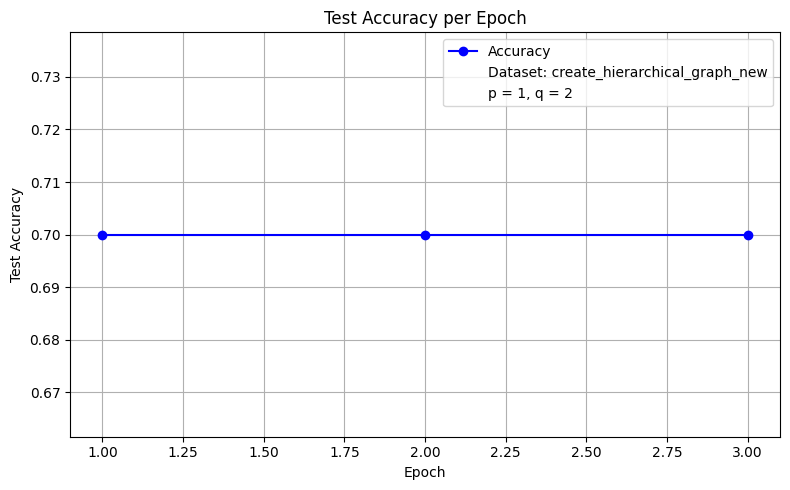

Running with p=2_q=1 = {'embedding_dim': 128, 'walk_length': 70, 'context_size': 14, 'walks_per_node': 18, 'num_negative_samples': 1, 'sparse': True, 'p': 2, 'q': 1}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 3 epochs...


Epoch: 001, Loss: 9.9525, Acc: 0.6571, Duration: 14.29s
    New best model saved with accuracy: 0.6571


Epoch: 002, Loss: 9.5575, Acc: 0.6571, Duration: 27.78s


Epoch: 003, Loss: 9.1657, Acc: 0.6571, Duration: 27.20s

Training finished.
Total elapsed time: 69.34 seconds
Best test accuracy: 0.6571
Best model state saved to './training_data/models/node2vec_'


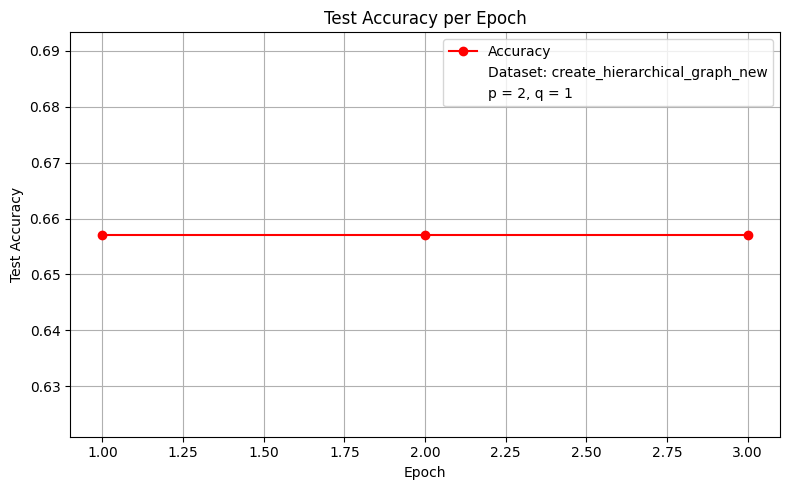

In [ ]:
train_n2v.train_node2vecs(data_list, 8)